## Objetivos formativos
- Diseñar un experimento de clasificación
- Implementar clasificadores basados redes neuronales multicapa
- Analizar los resultados obtenidos en un problema de clasificación
- Adquirir capacidad de decisión en resolución de problemas reales

### Librerías python para problemas de clasificación

**Librerías de aprendizaje automático, entrada-salida, procesamiento de vectores (arrays), representación, visión por computador:**

- NumPy: https://numpy.org/devdocs/contents.html
- SciPy: https://www.scipy.org/
- scikit-learn (utiliza las dos anteriores): https://scikit-learn.org/stable/
- Keras: https://keras.io
- Pandas: https://pandas.pydata.org/
- Matplotlib: https://matplotlib.org/
- OpenCV: https://pypi.org/project/opencv-python/

**Enlaces de interés:**
- [Herammient visual para NN](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.24301&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


### Redes neuronales multicapa. Ejemplo de las iris

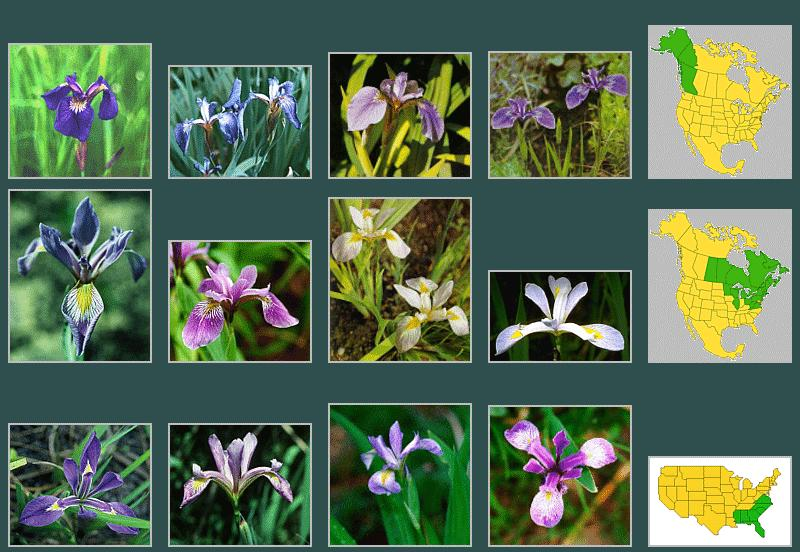



### Carga del conjunto de datos y representación gráfica:

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()

f1 = 2   # Las caracterísrticas más discriminativas son la  
f2 = 3   # longitud y anchura del pétalo (columnas 2 y 3)
X = iris.data[:,[f1,f2]]  
Y = iris.target

print(f'Targets: {iris.target_names}')
print(f'Features: {iris.feature_names}')

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()
ax.scatter(X[0:49,0], X[0:49,1], color='magenta', marker='d', label='Setosa') 
ax.scatter(X[50:99,0], X[50:99,1], color='r', marker='v', label='Versicolor')
ax.scatter(X[100:149,0], X[100:149,1], color='b', marker='^', label='Virginica')
ax.set_title('Iris')
ax.set_xlabel(iris.feature_names[f1])
ax.set_ylabel(iris.feature_names[f1])
ax.legend(loc='lower right')
plt.show()

**Experimenta**

Prueba otros pares de características y observa cómo de bien o mal separan visualmente las tres clases del dataset.

### Representación gráfica de las fronteras de decisión

**Entrenamiento del modelo**

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
iris = datasets.load_iris()
f1 = 2   # Las caracterísrticas más discriminativas son la  
f2 = 3   # longitud y anchura del pétalo (columnas 2 y 3)
X = iris.data[:,[f1,f2]]  
Y = iris.target
clf = MLPClassifier(solver='sgd',learning_rate_init=0.02, activation='logistic',max_iter=1000)
clf.fit(X,Y)
pass

**Representación de las fronteras de decisión**

In [ ]:
y1_min, y1_max = 0.5, 7.5
y2_min, y2_max = -0.25, 3
xx, yy = np.meshgrid(np.arange(y1_min, y1_max, 0.1),
                     np.arange(y2_min, y2_max, 0.1))
f, axarr = plt.subplots()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[0:49,0], X[0:49,1], color='magenta', marker='d')
axarr.scatter(X[50:99,0], X[50:99,1], color='r',marker='v')
axarr.scatter(X[100:149,0], X[100:149,1], color='b', marker='^')
axarr.set_title('NN')
plt.show()

**Experimenta**

- ¿Qué sucede en el script anterior si ponemos y1_min, y1_max = 1.5, 5.5?
- ¿Qué sucede si en la función meshgrid cambiamos el valor 0.1 por 0.5? 
- ¿Qué sucede si incrementamos el factor de aprendizaje? ¿Y si lo decrementamos?
- Repite el experimento del script con la anchura y longitud de los sépalos.

### Cómputo del valor óptimo de neuronas en capas ocultas

En el constructor de la clase `MLPClassifier` podemos especificar el número de capas ocultas y la cantidad de neuronas en cada una de estas capas mediante el parámetro `hidden_layer_sizes`. Este parámetro debe ser una tupla en la que el número de elementos indica el número de capas, y el valor de cada elemento indica el número de neuronas en esa capa. Por ejemplo, `hidden_layer_sizes = (8,5)` crea una NN con dos capas ocultas, la primera de ellas con 8 neuronas y la segunda con 5.

El siguiente script testea el rendimiento de NN en función del número de neuronas (entre 2 y 9) en una única capa oculta.

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score

# Cargar dataset
f1,f2 = 2,3 # Features
iris = datasets.load_iris()
X = iris.data[:,[f1,f2]]
Y = iris.target

# Probar MLP con distinto número de neuronas en la capa oculta
hidden_L = list(range(2,10,1))
cv_scores = [ ]
for H in hidden_L:
    print('.', end='')
    clf = MLPClassifier(solver='sgd',learning_rate_init=0.02,
                    hidden_layer_sizes=(H),
                    activation='logistic',max_iter=5000)
    scores = cross_val_score(clf,X,Y,cv = 10,scoring ='accuracy')
    cv_scores.append(scores.mean())
print('done')

In [ ]:
# Mostrar gráfica de barras con resultados
fig, ax = plt.subplots()
ax.bar(hidden_L, cv_scores)
ax.set_xlabel('Hidden layers')
ax.set_ylabel('Accuracy')
plt.show()

# Mostrar mejor resultado
max_score = max(cv_scores)
pos = cv_scores.index(max_score)
best_neurons = hidden_L[pos]
print(f'Best number of neurons in hidden layer: {best_neurons}  Score:{max_score}')

**Experimenta**

- Modifica el script anterior para realizar el experimento con 5 particiones.

### Ejercicio: error de clasificación

Cuando el error de clasificación es pequeño se debe proporcinar este error (en lugar del porcentaje de aciertos) junto con los intervalos de confianza.

Por lo tanto, para el ejemplo de las iris, la gráfica más correcta sería:

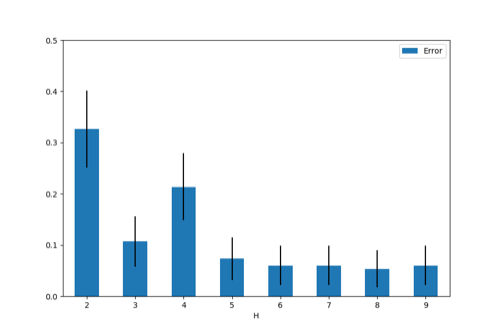

Trata de obtener la gráfica anterior. Para ello ten en cuenta que puedes obtener los intervalos de confianza del siguiente modo:

`
confidence = 0.95
stderr = stats.sem(1 - np.array(scores))  # Error estándar medio
confidence_int = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
`

O así:

`
mse = [1-x for x in cv_scores]
confidence_int = [1.96 * math.sqrt(x*(1-x)/len(Y)) for x in mse]
`

Y a continución mostrarlos en una gráfica de barras con:

`
plt.bar(hidden_L, mse, yerr=confidence_int, capsize=5)
plt.show()
`

In [ ]:
# SOLUCIÓN:

import math
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from scipy import stats

f1,f2 = 2,3 # Features
iris = datasets.load_iris()
X = iris.data[:,[f1,f2]]
Y = iris.target

hidden_L = list(range(2,10,1))
cv_scores = [ ]
confidence_int = []
for H in hidden_L:
    print('.', end='')
    clf = MLPClassifier(solver='sgd',learning_rate_init=0.003,
                    hidden_layer_sizes=H,
                    activation='logistic',max_iter=5000, random_state=42)
    scores = cross_val_score(clf,X,Y,cv = 10,scoring ='accuracy')
    cv_scores.append(scores.mean())
    
    # Intervalos de confianza
    confidence = 0.95
    n = len(scores)
    stderr = stats.sem(1 - np.array(scores))  # Error estándar de los errores
    interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
    confidence_int.append(interval)

mse = [1-x for x in cv_scores]

# Intervalos de confianza
confidence_int2 = [1.96 * math.sqrt(x*(1-x)/len(Y)) for x in mse]

# Crear el gráfico de barras con los errores
plt.bar(hidden_L, mse, yerr=confidence_int2, capsize=5)

# Agregar etiquetas y título
plt.xlabel('Neuronas en capa oculta')
plt.ylabel('Error medio')
plt.title('Errores medios con intervalos de confianza')

# Mostrar el gráfico
plt.show()